<a href="https://colab.research.google.com/github/Mehnaaz28/Stock-market-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
dataset=pd.read_csv("/content/Google_Stock_Price_Test.csv.xls", index_col="Date", parse_dates=True)


In [ ]:
dataset.head()



,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,32525.00,332.83,324.97,325.59,7380500
2012-01-04,331.27,333.87,329.08,332.45,5749400
2012-01-05,329.83,330.75,326.89,330.21,6593000
2012-01-06,328.34,328.77,323.68,328.24,5405900
2012-01-09,322.04,322.29,309.46,321.76,11688800


In [ ]:
dataset.isna().any()



Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2012-01-03 to 2012-01-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


<Axes: xlabel='Date'>

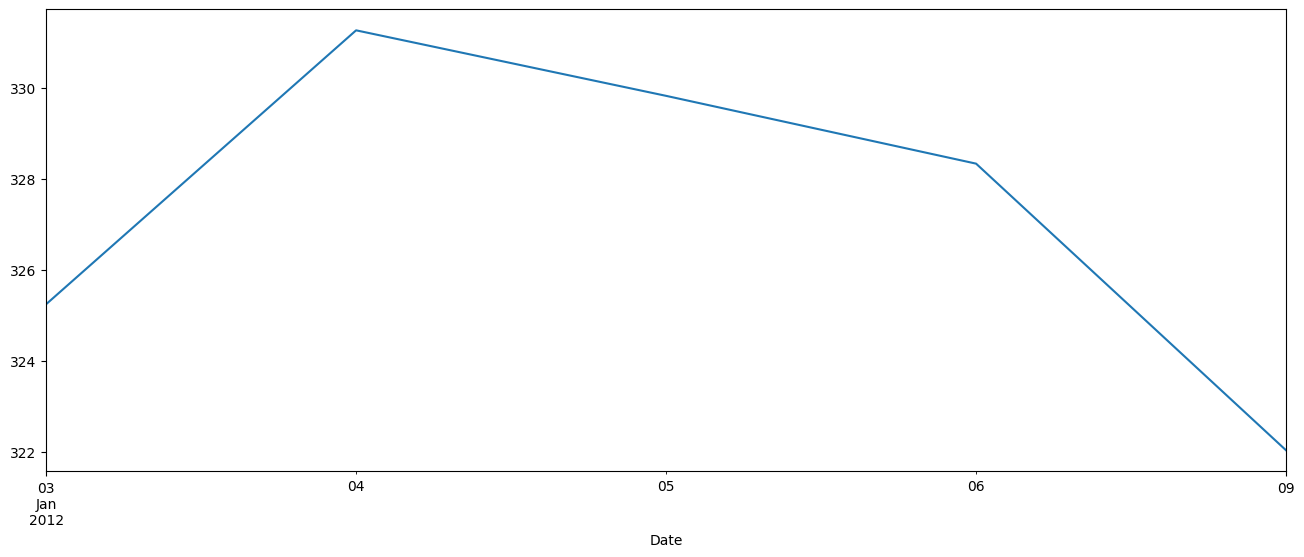

In [ ]:
dataset['Open'].plot(figsize=(16,6))


In [ ]:
dataset["Close"]=dataset["Close"].astype(str).str.replace(',','').astype(float)


In [ ]:
dataset["Volume"]=dataset["Volume"].astype(str).str.replace(',','').astype(float)

In [ ]:
dataset.rolling(7).mean().head(20)
dataset.dropna()

,Open,High,Low,Close,Volume
Date,,,,,
01-03-2012,325.25,332.83,324.97,325.59,7380500
01-04-2012,331.27,333.87,329.08,332.45,5749400
01-05-2012,329.83,330.75,326.89,330.21,6593000
01-06-2012,328.34,328.77,323.68,328.24,5405900
01-09-2012,322.04,322.29,309.46,321.76,11688800


<Axes: xlabel='Date'>

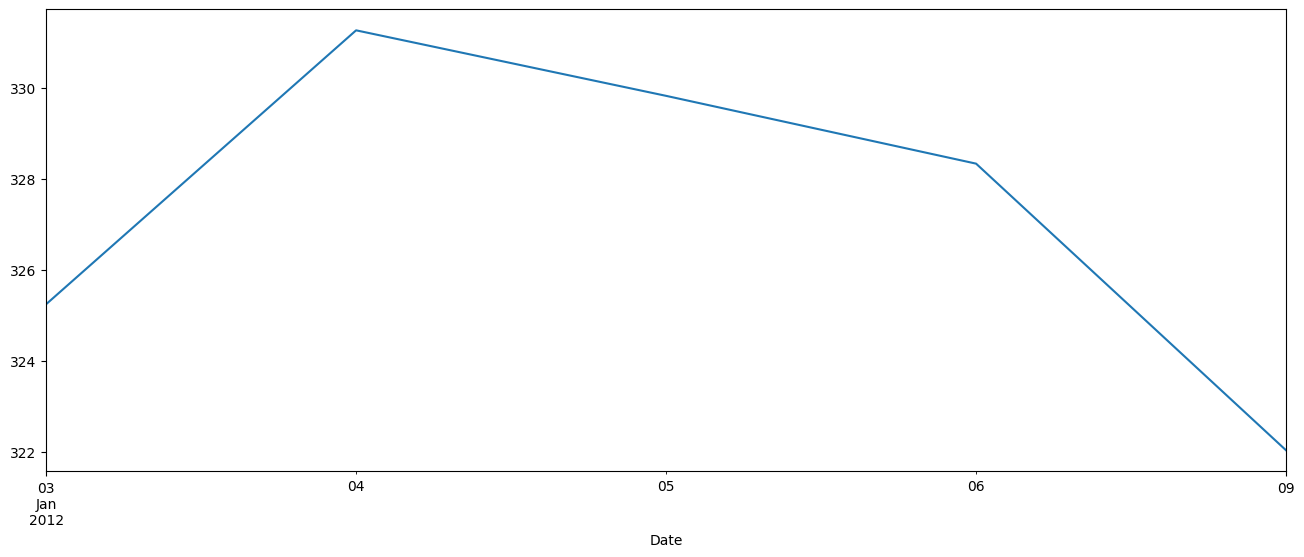

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()



<Axes: xlabel='Date'>

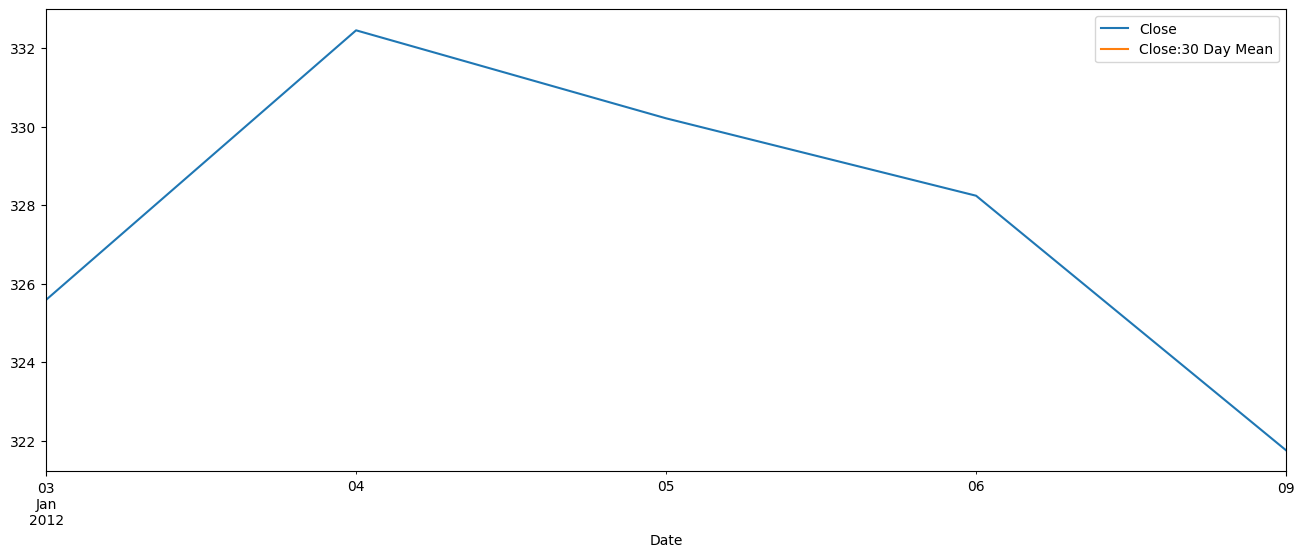

In [ ]:
dataset['Close:30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

<Axes: xlabel='Date'>

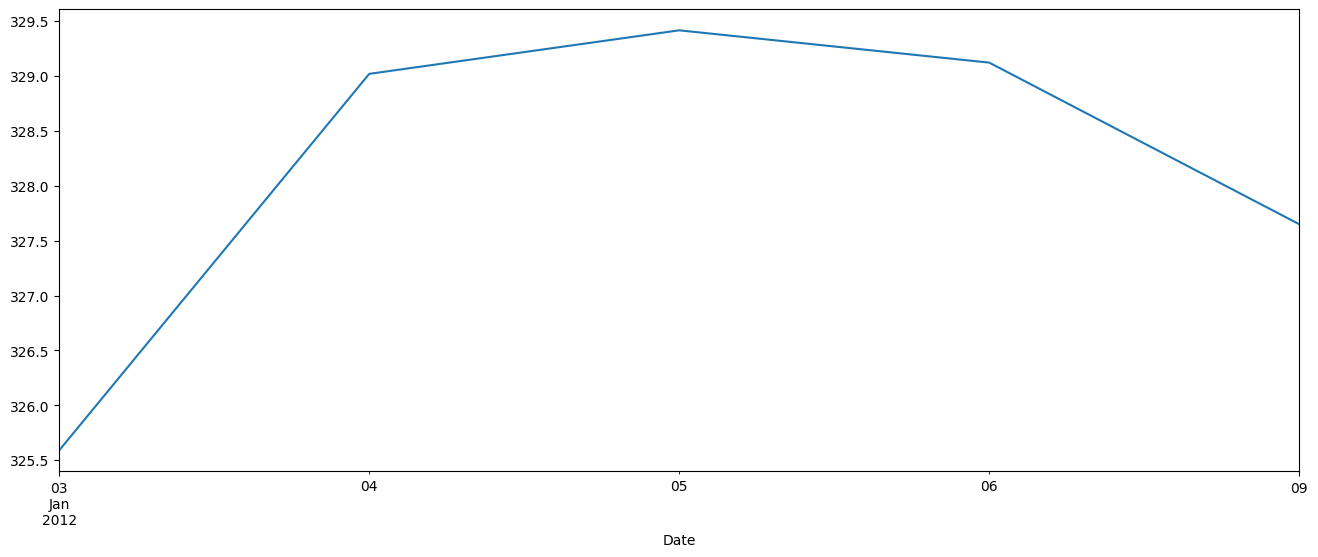

In [ ]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:

training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
X_train=[]
y_train=[]
for i in range(1,5):
    X_train.append(training_set_scaled[i-1:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:

regressor=Sequential()

In [ ]:

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))

In [ ]:
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.5445
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5400
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5356
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5306
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5276
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5225
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5160
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5108
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5076
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.5014
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5014
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4920
Epoch 13/100
1/1 [==============================] -

In [ ]:
dataset_test=pd.read_csv("/content/Google_Stock_Price_Test.csv.xls", index_col="Date", parse_dates=True)

In [ ]:

real_stock_price=dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,325.59,7380500
2012-01-04,331.27,333.87,329.08,332.45,5749400
2012-01-05,329.83,330.75,326.89,330.21,6593000
2012-01-06,328.34,328.77,323.68,328.24,5405900
2012-01-09,322.04,322.29,309.46,321.76,11688800


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2012-01-03 to 2012-01-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [ ]:
dataset_test["Volume"]=dataset_test["Volume"].astype(str).str.replace(',','').astype(float)


In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2012-01-03 to 2012-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [ ]:
dataset_total=pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-1:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(1,5):
    X_test.append(inputs[i-1:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price=regressor.predict(X_test)
pred_price=sc.inverse_transform(pred_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 2s 2s/step


In [ ]:

pred_price=pd.DataFrame(pred_price)
pred_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      float32
dtypes: float32(1)
memory usage: 144.0 bytes


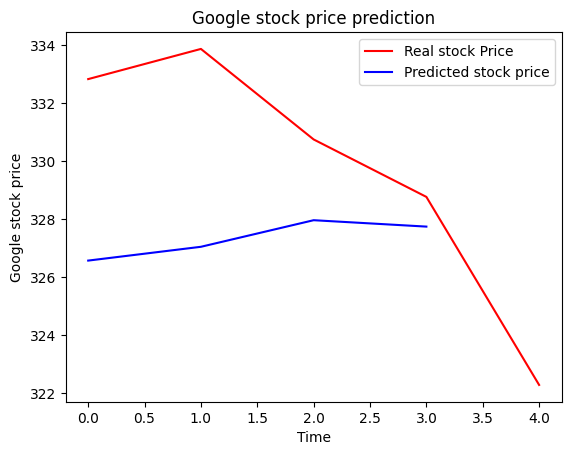

In [ ]:
plt.plot(real_stock_price, color="red", label="Real stock Price")
plt.plot(pred_price, color="blue", label="Predicted stock price")
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()